In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

i will update this and post it on kaggle 

In [31]:
import numpy as np

# Assuming you have already loaded and normalized the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()




Dataset saved as .npy files


In [32]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [33]:
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [34]:
x_train.shape,y_train.shape

#50000 images, 32x32 pixels, 3 channels{rgb}

((50000, 32, 32, 3), (50000, 1))

In [35]:
x_train[0].shape    

(32, 32, 3)

In [36]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [37]:
def plt_sample(image):
    plt.figure(figsize=(10,1))
    plt.imshow(image)

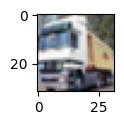

In [38]:
plt_sample(x_train[1])

In [39]:
class_names[y_train[1][0]]

'truck'

In [40]:
x_train_scaled,x_test_scaled = x_train/255.0,x_test/255.0

x_train_scaled,x_test_scaled    

(array([[[[0.23137255, 0.24313725, 0.24705882],
          [0.16862745, 0.18039216, 0.17647059],
          [0.19607843, 0.18823529, 0.16862745],
          ...,
          [0.61960784, 0.51764706, 0.42352941],
          [0.59607843, 0.49019608, 0.4       ],
          [0.58039216, 0.48627451, 0.40392157]],
 
         [[0.0627451 , 0.07843137, 0.07843137],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509804, 0.21568627],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117647, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215686, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941176, 0.19607843],
          [0.47058824, 0.32941176, 0.19607843],
          [0.42745098, 0.28627451, 0.16470588]],
 
         ...,
 
         [[0.81568627, 0.66666667, 0.37647059],
          [0.78823

In [41]:
def to_one_hot(y):
    return tf.keras.utils.to_categorical(y,num_classes=10)

In [42]:
y_train_categorical = to_one_hot(y_train)
y_test_categorical = to_one_hot(y_test)

y_train_categorical[0],y_test_categorical[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]))

neural network 1

neural network 2

In [51]:
from tensorflow.keras.optimizers import SGD

# Create the model
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.0001)  # You can adjust the learning rate
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(x_train_scaled, y_train_categorical, epochs=100)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.1874 - loss: 2.2256
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3081 - loss: 1.9278
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3400 - loss: 1.8671
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3513 - loss: 1.8376
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3621 - loss: 1.8202
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3667 - loss: 1.8080
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3680 - loss: 1.7991
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3654 - loss: 1.8165
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.3337 - loss: 1.9184
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.2474 - loss: 3.2721
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.1995 - loss: 9.91

KeyboardInterrupt: 

: 

In [44]:
model2.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1922 - loss: 73.1292


[73.77992248535156, 0.18889999389648438]

tf.Tensor([5. 7. 9.], shape=(3,), dtype=float32)
